<a href="https://www.kaggle.com/code/mohamedridaelbakri/startups-expansion-analysis?scriptVersionId=104541481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets-for-ethans-tableau-course/P1-nyc-park-crime-stats-q1-2018.pdf
/kaggle/input/datasets-for-ethans-tableau-course/P1-OfficeSupplies.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-PersonalVehicleSalesGlobal.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-OfficeSupplies-MAC.csv
/kaggle/input/datasets-for-ethans-tableau-course/P1-US-Cities-Population.csv
/kaggle/input/datasets-for-ethans-tableau-course/P1-Section-9-Challenge-II.pdf
/kaggle/input/datasets-for-ethans-tableau-course/P1-Section-9-Challenge-I.pdf
/kaggle/input/datasets-for-ethans-tableau-course/P1-StartupExpansion.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-Airline-Comparison.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/Long-Term-Unemployment-Statistics.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-SuperStoreUS-2015.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-AmazingMartEU2.xlsx
/kaggle/input/datasets-for-ethans-tableau-course/P1-OfficeSupplie

In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.3 MB/s eta 0:00:00


In [3]:
df = pd.read_excel("/kaggle/input/datasets-for-ethans-tableau-course/P1-StartupExpansion.xlsx")

In [4]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [6]:
df[["Marketing Spend", "Revenue"]].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


In [7]:
df['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [8]:
df['City'].nunique()

149

In [9]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [10]:
df['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [11]:
df['State'].nunique()

35

In [12]:
df.groupby('State').describe()['Revenue'].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Arkansas,1.0,68828.000000,NaN,68828.0,68828.00,68828.0,68828.00,68828.0
Rhode Island,1.0,62337.000000,NaN,62337.0,62337.00,62337.0,62337.00,62337.0
Alabama,4.0,55256.250000,5400.887975,49290.0,51408.00,55698.5,59546.75,60338.0
Mississippi,1.0,54701.000000,NaN,54701.0,54701.00,54701.0,54701.00,54701.0
New York,3.0,53348.666667,11803.771191,41313.0,47570.00,53827.0,59366.50,64906.0
Tennessee,3.0,50802.000000,8901.316700,40545.0,47951.00,55357.0,55930.50,56504.0
South Dakota,1.0,50583.000000,NaN,50583.0,50583.00,50583.0,50583.00,50583.0
Michigan,3.0,49253.000000,15323.816855,35022.0,41142.00,47262.0,56368.50,65475.0
Virginia,2.0,48203.500000,13324.013078,38782.0,43492.75,48203.5,52914.25,57625.0


In [13]:
df['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [14]:
#Number of stores in each Region
df['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

<AxesSubplot:>

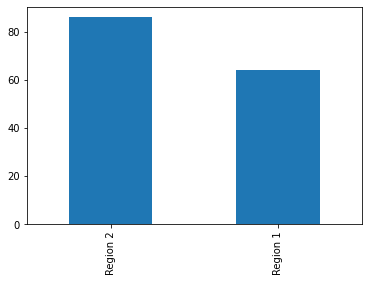

In [15]:
df['Sales Region'].value_counts().plot.bar()

In [16]:
df['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [17]:
df['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [18]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df['Store ID'].value_counts()

1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Store ID, Length: 150, dtype: int64

In [21]:
df.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
54,55,West Covina,California,Region 2,Old,2939,21824
92,93,Elgin,Illinois,Region 1,Old,2553,18215
12,13,Las Cruces,New Mexico,Region 2,Old,2895,19888
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828
89,90,Tacoma,Washington,Region 2,Old,2552,45666
99,100,Billings,Montana,Region 1,Old,3015,20541
45,46,Pasadena,California,Region 2,Old,2790,48254
27,28,Salt Lake City,Utah,Region 2,Old,3620,56921
68,69,Lakeland,Florida,Region 1,Old,3003,18297
85,86,Gresham,Oregon,Region 2,Old,2745,19708


In [22]:
df.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [23]:
#Revenue by City
df.groupby('City').sum()['Revenue'].nlargest(10)

City
Rochester         83005
Little Rock       68828
Grand Rapids      65475
Oxnard            64302
Brownsville       63148
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Name: Revenue, dtype: int64

In [24]:
#Revenue in New Cities
df[df['New Expansion'] == "New"].groupby('City').sum()['Revenue']

City
Brownsville         63148
Chattanooga         55357
College Station     22457
Glendale            49376
Joliet              48315
Paterson            34603
Rancho Cucamonga    52366
Rockford            43377
Tempe               48954
Thousand Oaks       40141
Name: Revenue, dtype: int64

In [25]:
#Create a column for profit
df['Profit'] = df['Revenue'] - df['Marketing Spend']

In [26]:
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018


In [27]:
#Store with Highest Revenue
df[df['Revenue'] == df['Revenue'].max()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388


In [28]:
#Store with Highest Profit
df[df['Profit'] == df['Profit'].max()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388


In [29]:
#Store with Lowest Revenue
df[df['Revenue'] == df['Revenue'].min()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
53,54,Everett,Washington,Region 2,Old,3129,15562,12433


In [30]:
#Store with Lowest Profit
df[df['Profit'] == df['Profit'].min()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
53,54,Everett,Washington,Region 2,Old,3129,15562,12433


In [31]:
#Store with Highest Marketing Spend
df[df['Marketing Spend'] == df['Marketing Spend'].max()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105


In [32]:
#Store with Lowest Marketing Spend
df[df['Marketing Spend'] == df['Marketing Spend'].min()]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
135,136,San Mateo,California,Region 2,Old,1811,19426,17615


In [33]:
df['ROMS'] = ((df['Profit'] / df['Marketing Spend']) * 100).round(2) #Return On Marketing Spend

In [34]:
df['ROMS%'] = df['ROMS']/100

In [35]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [36]:
df.to_csv('StartupExpansionVZ.csv')